In [1]:
import pandas as pd
import numpy as np
import mat73  
import os
import matplotlib.pyplot as plt
import urllib.request,io,os,sys
import tools                       # local module to deel with time format change
from scipy.io import savemat, loadmat
import warnings
from datetime import datetime
import pandas as pd
path = '/Users/justambush/OneDrive/autumn2022/【Data Driven】/1016/raw_data/'
os.chdir(path)


warnings.filterwarnings("ignore")  # warnings filter

## scrape data and turn mat

In [38]:

def get_dataframe(name):
    end_date = datetime.strptime('2022-10-21','%Y-%m-%d').timestamp()
    req = urllib.request.Request("https://query1.finance.yahoo.com/v7/finance/download/"+name+"?period1=1601942400&period2={}&interval=1d&events=history&includeAdjustedClose=true").format(end_date)

    f = urllib.request.urlopen(req)

    s = f.read()

    s = s.decode('gbk','ignore')


    data = s.split('\n')

    dic = {}
    for i in data[0].split(','):
        dic[i]=[]
    for j in data[1:]:
        lst = j.split(',')
        for i in range(len(lst)):
            if lst[i]=='null':
                lst[i]=0
        dic['Date'].append(lst[0])
        dic['Open'].append(round(float(lst[1]),6))
        dic['High'].append(round(float(lst[2]),6))
        dic['Low'].append(round(float(lst[3]),6))
        dic['Close'].append(round(float(lst[4]),6))
        dic['Adj Close'].append(round(float(lst[5]),6))
        dic['Volume'].append(int(lst[6]))


    df = pd.DataFrame(dic)

    df.to_csv(path+name+'.csv')

def comp_list():
    uni = pd.read_csv('universe.csv')
    com_list = []
    for i in uni['symbol']:
        com_list.append(i)
    # a = com_list[-1]
    # com_list = com_list[:-2]
    # com_list.append(a)
    return com_list

def scrape(com_list):
    for j in com_list:
        get_dataframe(j)

def re_file():
    com_list = comp_list()
    ind = pd.read_csv(path+'VXX.csv')['Date']
    Open = pd.DataFrame(columns=com_list)
    High = pd.DataFrame(columns=com_list)
    Low = pd.DataFrame(columns=com_list)
    Close = pd.DataFrame(columns=com_list)
    AdjClose = pd.DataFrame(columns=com_list)
    Volume = pd.DataFrame(columns=com_list)
    TotalRet = pd.DataFrame(columns=com_list)
    for name in com_list:
        tmp = pd.read_csv(path+name+'.csv')
        Open[name] = tmp['Open']
        High[name] = tmp['High']
        Low[name] = tmp['Low']
        Close[name] = tmp['Close']
        AdjClose[name] = tmp['Adj Close']
        Volume[name] = tmp['Volume']
        TotalRet[name] = tmp['Close'].pct_change()
    saved = {
    'LocalID':np.array(com_list),
    'Date':np.array(ind),
    'Open':np.array(Open),
    'High':np.array(High),
    'Low':np.array(Low),
    'Close':np.array(Close),
    'Volume':np.array(Volume),
    'TotalRet':np.array(TotalRet),
    'AdjClose':np.array(AdjClose)
}

    savemat('100stock.mat',saved)



In [39]:
# scrape(comp_list())

In [40]:
# re_file()

## load data

In [41]:
# change browser to chrome to open jupyter notebook : https://www.jb51.net/article/186420.htm

# import basic modules
# load raw data

file = path + '100stock.mat'
data1 = loadmat(file)  

col = data1['LocalID']
ind = ind = pd.read_csv(path+'VXX.csv')['Date']
for i in range(len(col)):
    col[i] = col[i].replace(' ','')
 
Open = data1['Open']
Open = pd.DataFrame(Open)
Open.columns  = col
Open.index = ind


High = data1['High']
High = pd.DataFrame(High)
High.columns  = col
High.index = ind
    
Low = data1['Low']
Low = pd.DataFrame(Low)
Low.columns  = col
Low.index = ind
   
Close = data1['Close']
Close = pd.DataFrame(Close)
Close.columns  = col
Close.index = ind

# AdjClose = data1['AdjClose']
# AdjClose = pd.DataFrame(AdjClose)
# AdjClose.columns  = col
# AdjClose.index = ind

Volume = data1['Volume'] # 日交易量
Volume = pd.DataFrame(Volume)
Volume.columns  = col
Volume.index = ind


TotalRet = data1['TotalRet']
TotalRet = pd.DataFrame(TotalRet)
TotalRet.columns  = col
TotalRet.index = ind

del data1, file


In [42]:
Open

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,BTC-USD,ETH-USD,BNB-USD,ADA-USD,XRP-USD,SOL-USD,DOGE-USD,DOT-USD,SHIB-USD,AVAX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-06,87.970001,223.589996,86.620003,125.779999,101.010002,60.330002,164.520004,158.250000,161.490005,129.279999,...,10796.306641,353.956482,28.666071,0.097536,0.250834,2.655200,0.002612,4.169271,0.0,3.982504
2020-10-07,86.160004,221.899994,88.800003,123.739998,101.720001,61.500000,162.619995,156.750000,159.119995,128.110001,...,10603.355469,340.943085,27.697977,0.092862,0.245435,2.175809,0.002593,3.753456,0.0,3.538809
2020-10-08,87.269997,226.039993,88.930000,124.769997,102.699997,61.700001,166.580002,161.249496,157.960007,130.029999,...,10669.371094,342.044647,27.713493,0.093785,0.248887,2.299982,0.002584,3.857625,0.0,3.448156
2020-10-09,87.410004,225.860001,89.949997,126.510002,104.669998,63.290001,170.000000,160.500000,161.009995,133.039993,...,10927.913086,351.112885,27.738211,0.096271,0.251449,2.367742,0.002616,4.111853,0.0,3.911574
2020-10-12,88.169998,229.690002,89.699997,125.300003,104.680000,64.059998,169.750000,167.496994,158.990005,131.600006,...,11059.142578,365.402466,28.435131,0.101466,0.253227,2.536933,0.002654,4.260407,0.0,4.241963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07,139.009995,266.480011,84.550003,148.830002,93.099998,85.169998,272.549988,118.000000,175.949997,168.139999,...,38285.281250,2639.447021,374.299286,0.888989,0.722852,86.470795,0.131561,16.570091,250.0,74.542030
2022-10-10,139.029999,261.489990,83.250000,148.600006,93.129997,82.000000,274.549988,115.099998,173.279999,166.949997,...,37278.566406,2588.166260,366.349182,0.868515,0.698580,84.863579,0.127821,15.998877,250.0,73.669731
2022-10-11,138.020004,256.200012,84.309998,149.339996,91.290001,77.739998,271.089996,112.709999,171.169998,164.350006,...,38333.746094,2598.436279,361.216003,0.853572,0.696258,89.228134,0.123843,16.171318,240.0,76.537056


In [43]:
TradeDay = Volume.sum(1)
TradeDay[TradeDay>0] = 1
IndexRet = TotalRet.mean(1)
IndexRets = TotalRet.copy()
for v in IndexRets.columns:
    IndexRets[v] = IndexRet
IdioRet = TotalRet - IndexRets 

In [44]:
TotalRet[TotalRet==float('inf')]=0

## Beginning

### calculators

In [45]:
# Calculators
import math
import scipy.stats as st


def OnlyTrading(df,TradeDay):   # turn data with all natural date to data with trade day only
    dfCleaned = df[TradeDay == 1]
    return dfCleaned

def AllDate(df,dfCleaned,TradeDay):   # opposite
    out = df.copy() 
    for col in out.columns:
        out[col].values[:] = np.nan
    out[TradeDay == 1] = dfCleaned
    return out

##  PN
def  pn_TransNorm_controid(df,start):  # normalization, like rank normalize, 每一只股票最后一行有一个值，加总=0
    out = df.copy()
    count_ = df.sum(1)
    for col in out.columns:
        out[col].values[:] = np.nan#out全部置为nan
    for v in range(len(df.index)):
        if v < start:#start之前跳过
            continue
        if TradeDay.values[v] == 0:#不是trade day跳过
            continue
        # print(v)
        data_ = df.iloc[v]#取第v行
        if count_.iloc[v] == 0:#如果该行和为0跳过
            continue
        data2_ =data_[ np.isnan(data_) == False ] #把nan去掉 感觉有问题
        Idxv = data2_.rank()
        A=0.4424
        B=0.1185
        beta=0.21
        alpha = A-pow((B * len(Idxv)),(beta* - 1))
        p1 = len(Idxv) + 1 - Idxv - alpha 
        p2 = len(Idxv)- 2*alpha+ 1 
        IdxV = (p1 / p2)  
        p3 =  st.norm.ppf(IdxV)
        data2_.values[:] = p3
        se = pd.Series(p3, index=data2_.index) * -1
        data_[ np.isnan(data_) == False ] = se
        out.iloc[v] = data_
    return out


## TS

def ts_Delay(df, num): #让昨天的数据覆盖今天的
    dfCleaned = OnlyTrading(df,TradeDay)
    dfCleaned = dfCleaned.shift(num)   # shift, like:  df.shift(1), let yesterday's data to today 
    df = AllDate(df,dfCleaned,TradeDay)
    return df    
 
    
def ts_Mean(df, num):                # equal weight
    dfCleaned = OnlyTrading(df,TradeDay)
    sums = 0 
    for v in range(num):
        if v == 0:
            dfCleaned2 = dfCleaned.copy()
        else:    
            dfCleaned2 = dfCleaned2 + dfCleaned.shift(v)
        sums = sums + 1
    dfCleaned2 = dfCleaned2 / sums
    df = AllDate(df,dfCleaned2,TradeDay)
    return df
    
def ts_Decay(df, num):                 # decayed weight: linear change
    dfCleaned = OnlyTrading(df,TradeDay) #只对trading day进行训练
    sums = 0 
    for v in range(num):
        if v == 0:
            dfCleaned2 = dfCleaned.copy()
        else:    
            dfCleaned2 = dfCleaned2 + dfCleaned.shift(v) * (num - v ) / num #让越近的数据占比权重越来越大
        sums = sums + (num - v ) / num  
    dfCleaned2 = dfCleaned2 / sums
    df = AllDate(df,dfCleaned2,TradeDay)
    return df

def cf(j,n):
    A=0.4424
    B=0.1185
    beta=0.21
    α = A-math.pow(B * n, beta* - 1 )
    p1 = n + 1 - j - α
    p2 = n - 2*α+ 1
    p3 =  st.norm.ppf((p1 / p2))
    return p3

def ts_DecayExp(df, num):   # decayed weight: nonlinear change
    dfCleaned = OnlyTrading(df,TradeDay)
    series = [i for i in range(1, num * 2 + 1, 1)]
    out = list()
    n =len(series)
    # get weights
    for v in range(len(series)):
        j = v + 1
        out.append(cf(j,n))
    out2 = out[:num]
    sums = 0 
    dfCleaned2 = dfCleaned * 0 
    for v in range(num):
        dfCleaned2 = dfCleaned2 + dfCleaned.shift(v) * out2[v]
        sums = sums + out2[v]
    dfCleaned2 = dfCleaned2 / sums
    df = AllDate(df,dfCleaned2,TradeDay)
    return df


def Compare(df1,df2,Isbigger):
    if Isbigger == 1: # max
        mean = (df1 + df2)/2
        gap =  (df1 - df2).abs() / 2 
        out = mean + gap
    elif Isbigger == -1 : # min
        mean = (df1 + df2)/2
        gap =  (df1 - df2).abs() / 2 
        out = mean - gap
    return out
          
def ts_Max(df, num):                # get the max value of last num trading day
    dfCleaned = OnlyTrading(df,TradeDay)
    for v in range(num):
        if v == 0:
            dfCleaned2 = dfCleaned.copy()
        else:    
            dfCleaned2 = Compare(dfCleaned2,dfCleaned.shift(v),1)
    df = AllDate(df,dfCleaned2,TradeDay)
    return df


def ts_Min(df, num):             # get the min value of last num trading day  
    dfCleaned = OnlyTrading(df,TradeDay)
    for v in range(num):
        if v == 0:
            dfCleaned2 = dfCleaned.copy()
        else:    
            dfCleaned2 = Compare(dfCleaned2,dfCleaned.shift(v),-1)
    df = AllDate(df,dfCleaned2,TradeDay)
    return df

def ts_Delta(dfCleaned, num):   
    dfCleaned2 = dfCleaned - ts_Delay(dfCleaned,num)
    return dfCleaned2


def ts_Stdev(df, num):             # get the moving standard deviation
    dfCleaned = OnlyTrading(df,TradeDay)
    dfCleaned2 = dfCleaned.rolling(num).std()
    df = AllDate(df,dfCleaned2,TradeDay)
    return df

# more calculator , see df.rolling: http://blog.sina.com.cn/s/blog_12c3192a50102xghs.html  


In [46]:
# factor performance： return， cost ， turnover rate
def GetCost(f1_stand_D2,cost):
    Cost = cost * ( f1_stand_D2 - ts_Delay(f1_stand_D2,1) )
    return Cost.abs()

def GetTurnover(f1_stand):
    a = ( f1_stand - ts_Delay(f1_stand,1) ).abs().sum(1) 
    b = ts_Delay(f1_stand,1).abs().sum(1)
    b[b==0] = np.nan
    z = a/b
    c = round(z.mean(),3) #返回一个数字，2天后的回报率？
    return c

def PerformanceWithCost(f1_stand,TotalRet,delayNum,cost,fig,SDate,EDate):
    f1_stand_D2 = ts_Delay(f1_stand,delayNum)  # ***
    factorRet = f1_stand_D2 * TotalRet #两天前的因子值*今天的return=该因子的performance
    print(factorRet.mean(1).mean())
    # convert negative factor to positive
    # factorRet.to_csv('a.csv')
    if factorRet.mean(1).mean() < 0:
        factorRet =  factorRet  * -1
    # get cost
    # Cost = GetCost(f1_stand_D2,cost)
    # factorRet = factorRet  - Cost
    # choose date & clean data
    factorRet= factorRet.iloc[SDate:EDate]
    factorRetLine = factorRet.mean(1) #每天股票的平均回报
    factorRetLine[factorRetLine == 0 ] = np.nan
    # get Sharpe ratio and annual return
    sr1 = factorRetLine.mean() / factorRetLine.std() * 15
    ret1 = factorRetLine.mean() * 250
    # plot picture if fig == 1
    if fig == 1:
        factorRetLine[np.isnan(factorRetLine)] = 0 
        Cumsums = factorRetLine.cumsum()
        Cumsums.index = tools.Str2times(Cumsums.index)
        # print(Cumsums)
        plt.plot(Cumsums)
        plt.title('Factor Return: Sharpe Ratio = ' + str(round(sr1,4)))
    # print 
    print('SR:',round(sr1,3),'AR:',round(ret1,3),'TO:',GetTurnover(f1_stand))
    return round(sr1,3) , round(ret1,3) , factorRetLine

### simple

In [47]:
# Check the factor decay: QuantileRet

def GetRets(f_,delayNum,SDate,EDate):
    f1_stand_D2 = ts_Delay(f_,2)
    StraRet = f1_stand_D2 * TotalRet
    StraRet= StraRet.iloc[SDate:EDate]
    StraRetLine = StraRet.mean(1) 
    StraRetLine[StraRetLine == 0 ] = np.nan
    ret = StraRetLine.mean() * 250
    StraRetLine[StraRetLine.isna()] = 0
    return ret, StraRetLine
        
def GetQuantileRet(CF,Q,SDate,EDate,delayNum,plotfig):
    CF2 = CF.copy()
    CF2[CF2 == 0] = np.nan
    q_ = Q 
    Rets = list()
    for v in range(q_):
        f_ = CF2.copy()
        lowBan = f_.quantile(v/q_,axis =1)
        upBan = f_.quantile(v/q_ + 1/q_,axis =1)
        lowBan = tools.Repmat(f_,lowBan) 
        upBan = tools.Repmat(f_,upBan) 
        f2 = CF.copy()
        f2[f2 > 1 ]= 1
        f2[f2 <= 1 ] = 1
        f2[f_ < lowBan] = np.nan
        f2[f_ >= upBan] = np.nan
        [ret,StraRetLine] = GetRets(f2,delayNum,SDate,EDate)
        Rets.append(round(ret,4))
        print(Rets)
        if plotfig == 1:
            StraRetLine.index= tools.Str2times(StraRetLine.index)
            plt.plot(StraRetLine.cumsum())
            plt.title('Quantile Return')
    Decayed = pd.DataFrame()
    Decayed['Annualized Return'] = Rets
    Decayed.index = range(q_)
    Decayed.index = Decayed.index - q_/2
    return Decayed


In Sample return
0.00090102786126749
SR: 2.16 AR: 0.236 TO: 0.012
0.0008321798283517299
SR: 2.063 AR: 0.242 TO: 0.174
0.0009712801184189029
SR: 2.358 AR: 0.282 TO: 0.113
0.0005773845093662954
SR: 1.697 AR: 0.152 TO: 0.17
0.0008880516476541103
SR: 2.154 AR: 0.26 TO: 0.055


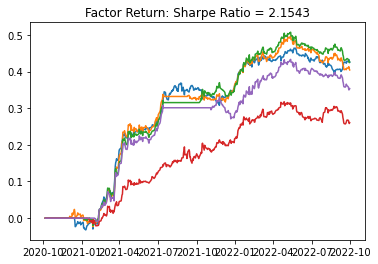

In [48]:
# formulas for factors

f_formulas = [
    '-1*ts_Decay((ts_Decay(Close,10)-ts_Decay(Low,10))/Volume*(High-Low),40)',
      'ts_Decay(IdioRet*(Volume/ts_Delay(Volume,1)),40)',
       'ts_Decay(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',
       'ts_Decay(ts_Delta(Close*ts_Decay(TotalRet,5),5)*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',   
       'ts_DecayExp(ts_Mean(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),20),60)',
]
# f_formulas = ['-1*ts_Decay((ts_Decay(Close,10)-ts_Decay(VWAP,10))/VWAP*(High-Low),40)',
#       '-1*ts_Decay(IdioRet*(Volume/ts_Delay(Volume,1)),40)',
#        '-1*ts_Decay(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',
#        '-1*ts_Decay(ts_Delta(Close*ts_Decay(TotalRet,5),5)*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',   
#        '-1*ts_Decay(VWAP/Close*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),10)', 
#        '-1*ts_Decay(VWAP/Close*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),40)',
#        '-1*ts_DecayExp(ts_Mean(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),20),60)',
#        '-1*ts_DecayExp(ts_Mean(VWAP/Close*(High-Low)/Close,20),20)',
#        '-1*ts_DecayExp(VWAP/Close*(High-Low)/Close,60)',
#       '-1*ts_Mean((ts_Decay(Close,10)-ts_Decay(VWAP,10))/VWAP*(High-Low)/Close,20)'
#       ]

# calculate the factor values
fs_v = list()
for v in f_formulas:
    fs_v.append(eval(v))   ## eval(v): function that run the code v written by string
# print(fs_v)
# Normalize 把因子的值放在同一维度进行比较
for v in range(len(fs_v)):
    fs_v[v] = pn_TransNorm_controid(fs_v[v],1).round(3)
    

print('In Sample return')

delayNum = 2
SDate,EDate = 1,500   # Attention: In sample test
cost = 0   # Tips: should we add the cost? or smaller cost rate?
srs = list()
rets =list()
retLs = pd.DataFrame()

for v in range(len(fs_v)):
    [sr1 , ret1 , StraRetLine] = PerformanceWithCost(fs_v[v],TotalRet,delayNum,cost,1,SDate,EDate)
    srs.append(sr1)
    rets.append(ret1)
    retLs[str(v)] = StraRetLine 


### get weights for different index

In [49]:
# get Markowitz supported weights
#用最后一个可得交易日的数据作为下个交易日的因子权重
# functions to combine the factor values
#fs_w 对每个因子的权重
def F_CompositeF(fs_v,fs_w):
    n = 0 
    for v in range(len(fs_v)):
        if n == 0 :
            val__ = fs_v[v]
            val__[val__.isna()] = 0 
            out = val__ * fs_w[v]
            n = 1 
        else:
            val__ = fs_v[v]
            val__[val__.isna()] = 0 
            out = val__ * fs_w[v]   + out
    out[out == 0 ] = np.nan
    divided = np.sum(fs_w)
    out = out / divided
    return out

import scipy.optimize as sco

def Markowitz_opt(rets,retLs):
    A_return = rets
    A_cov = retLs.cov().to_numpy()
    def sharp(w):
        Rf = 0.00
        Rp_opt = np.sum(np.dot(w, A_return))
        Vp_opt = np.sqrt(np.dot(np.dot(w, A_cov), w.T))
        SR = (Rp_opt-Rf)/Vp_opt
        return (-SR)
    # optimazing constrain:  sum(weight ) = 1
    cons =  ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})   
    bnds = tuple((0, 1) for x in range(len(A_return)))
    result_sr = sco.minimize(sharp, len(A_return) * [1.0 / len(A_return), ], method='SLSQP', bounds=bnds,
                                          constraints=cons)
    w_mar = result_sr.x
    return w_mar

def Markowitz_opt_withCons(rets,retLs):
    A_return = rets
    A_cov = retLs.cov().to_numpy()
    def sharp(w):
        Rf = 0.00
        Rp_opt = np.sum(np.dot(w, A_return))
        Vp_opt = np.sqrt(np.dot(np.dot(w, A_cov), w.T))
        SR = (Rp_opt-Rf)/Vp_opt
        return (-SR)
    # optimazing constrain:  sum(weight ) = 1
    # optimazing constrain:  min(weight ) = 0  : let the min weight be 0, means: no short 
    # optimazing constrain:  max(weight ) = 0.3  : let the min weight be 0.3
    cons =  ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},\
        {'type': 'ineq', 'fun': lambda x: np.min(x) - 0},\
          {'type': 'ineq', 'fun': lambda x: -np.max(x) + 0.3} 
        )  
    bnds = tuple((0, 1) for x in range(len(A_return)))
    result_sr = sco.minimize(sharp, len(A_return) * [1.0 / len(A_return), ], method='SLSQP', bounds=bnds,
                                          constraints=cons)
    w_mar = result_sr.x
    return w_mar

0.0009619825681739194
SR: 2.063 AR: 0.24 TO: 0.132
0.0009754839820113489
SR: 2.098 AR: 0.244 TO: 0.129
0.001009986399818351
SR: 2.16 AR: 0.252 TO: 0.126
0.0009809903030202716
SR: 2.144 AR: 0.245 TO: 0.098


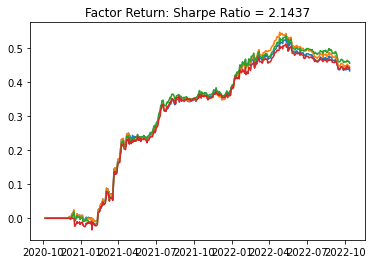

In [50]:
# OTS test
Q = 5
cost = 0
delayNum = 2
SDate,EDate = 1,len(Close.index)

# Equal weighting
fs_w = [1,1,1,1,1,1,1,1,1,1] 
CF_equal =  pn_TransNorm_controid(F_CompositeF(fs_v,fs_w),1)

# Sharpe ratio weight
CF_sr =  pn_TransNorm_controid(F_CompositeF(fs_v,srs),1)

# Annual Return weight
CF_ret =  pn_TransNorm_controid(F_CompositeF(fs_v,rets),1)

# Markowitz weight
w_mar = Markowitz_opt_withCons(rets,retLs)
CF_mark =  pn_TransNorm_controid(F_CompositeF(fs_v,w_mar),1)

[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_equal,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_sr,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_ret,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_mark,TotalRet,delayNum,cost,1,SDate,EDate)



In [51]:
# the wetghts in 4 methods 
print(np.round(np.array(fs_w)/np.sum(fs_w),2) )
print(np.round(np.array(srs)/np.sum(srs),2))
print(np.round(np.array(rets)/np.sum(rets),2))
print(np.round(np.array(w_mar)/np.sum(w_mar),2))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.21 0.2  0.23 0.16 0.21]
[0.2  0.21 0.24 0.13 0.22]
[0.3  0.   0.3  0.15 0.25]


### Holding portfolio with cost

In [52]:
# Holding portfolio with cost

def GetRets_Port(f_,delayNum,cost,num,SDate,EDate):
    f1_stand_D2 = ts_Delay(f_,delayNum)
    StraRet = f1_stand_D2 * TotalRet
    Cost = cost * ( f1_stand_D2 - ts_Delay(f1_stand_D2,1) )
    StraRet = StraRet - Cost.abs()
    StraRet= StraRet.iloc[SDate:EDate]
    StraRetLine = StraRet.sum(1) / num   # the single change
    StraRetLine[StraRetLine == 0 ] = np.nan
    ret = StraRetLine.mean() * 250
    sr = StraRetLine.mean() /StraRetLine.std() * 15 
    StraRetLine[StraRetLine.isna()] = 0 
    return sr,ret, StraRetLine

def GetTurnover2(f_,num):
    a = ( f_ - ts_Delay(f_,1) ).abs().sum(1) 
    a[a == 0 ] = np.nan
    z = a/num
    c = round(z.mean(),3)
    return c

def GetPortRet(CF,num,SDate,EDate,cost,delayNum,plotfig):
    f_ = CF.copy()
    numV = list()
    days_ = f_.abs().sum(1) #每天因子之和
    for v in range(len(f_.index)):
        if days_.iloc[v] == 0:
            numV.append(0)
            continue
        va11 = f_.iloc[v]#某一天
        z = va11.sort_values(ascending = False)#对改天因子回报进行排序
        numV.append(z.iloc[num-1])#选择第100个（作为一个Benchmark，选择前100个）
    numV = pd.DataFrame(numV)
    numV.index = f_.index
    numV = tools.Repmat(f_,numV) 
    f_[f_ < numV ] = 0
    f_[f_ > 0 ] = 1
    f_[f_.isna()] = 0 
    [sr,ret,StraRetLine] = GetRets_Port(f_,delayNum,cost,num,SDate,EDate)
    print(round(sr,3),round(ret,3),GetTurnover2(f_,num))
    if plotfig == 1:
        StraRetLine.index= tools.Str2times(StraRetLine.index)
        plt.plot(StraRetLine.cumsum())
        plt.title('Portfolio Return: Sharpe Ratio = ' + str(round(sr,4)))
    return sr,ret,StraRetLine


nan nan 0.162
nan nan 0.166
nan nan 0.136


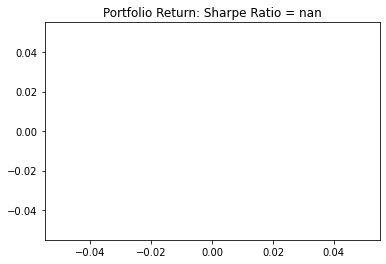

In [53]:
SDate = 1500
EDate = len(Close.index)
num = 100  # trade the stocks with biggest factor value
cost= 0.002

[sr,ret,StraRetLine] = GetPortRet(CF_sr,num,SDate,EDate,cost,delayNum,1)
[sr,ret,StraRetLine] = GetPortRet(CF_ret,num,SDate,EDate,cost,delayNum,1)
[sr,ret,StraRetLine] = GetPortRet(CF_mark,num,SDate,EDate,cost,delayNum,1)
plt.show()


### Rolling Opt

In [54]:
## Today： Rolling opt

def F_GetRollingCov(retLs,rolling_window):
    # calculate the only trade day cov
    dfCleaned = OnlyTrading(retLs,TradeDay)
    cov_r = list()
    for v in range(len(dfCleaned.index)):
        # if v <= rolling_window:
        #     cov_r.append(0)
        #     continue
        start_ = max(0,v-rolling_window)#241 => 1
        end_ = v # end = 241
        df_chose = dfCleaned.iloc[start_:end_] # 1:241
        cov_ = df_chose.cov().to_numpy() #计算协方差
        cov_r.append(cov_) #滑动窗口协方差
    # turn only trade day data to all day
    cov_r2 = list()
    init_ = 0
    for v in range(len(retLs.index)):#只+trade day
        if  TradeDay[v] == 1:
            cov_r2.append(cov_r[init_])
            init_ = init_ + 1
        else:
            cov_r2.append(0)
    return cov_r2

def F_Markowitz_opt_withCons_forRolling(A_return,A_cov,con_):
    def sharp(w):
        Rf = 0.00
        Rp_opt = np.sum(np.dot(w, A_return))
        Vp_opt = np.sqrt(np.dot(np.dot(w, A_cov), w.T))
        SR = (Rp_opt-Rf)/Vp_opt
        return (-SR)
    if con_ == 0:
        cons =  ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1} )  
    elif con_ == 1:  
        cons =  ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},\
                 {'type': 'ineq', 'fun': lambda x: np.min(x) - 0},\
                 {'type': 'ineq', 'fun': lambda x: -np.max(x) + 0.4} )  
    elif con_ == 2:
        cons =  ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   \
                 {'type': 'ineq', 'fun': lambda x: -np.max(x) + 0.3} )  
    bnds = tuple((0, 1) for x in range(len(A_return)))
    result_sr = sco.minimize(sharp, len(A_return) * [1.0 / len(A_return), ], method='SLSQP', bounds=bnds,
                                          constraints=cons)
    w_mar = result_sr.x
    return w_mar

def F_GetRollingFactors(fs_v,retLs,rolling_window,method):
    # Step 1 :  prepare data: 
    # Tips:  we can also change the calculation of the sr , ret , cov
    rets_rolling = ts_Mean(retLs,rolling_window) * 250  # change to st_Decay?
    rets_rolling[rets_rolling.isna()] = 0
    sr_rolling = ts_Mean(retLs,rolling_window) / ts_Stdev(retLs,rolling_window) * 15 
    sr_rolling[sr_rolling.isna()] = 0
    rets_rolling[rets_rolling < 0 ] = 0   # let the minimun weight be 0
    sr_rolling[sr_rolling < 0 ] = 0
    if method >= 4:      
        cov_rolling = F_GetRollingCov(retLs,rolling_window)
    # Step2: compose the factors daily 
    # initialize
    out = fs_v[0].copy()
    out[out.isna()] = 0 
    out = out * 0 
    for v in range(len(retLs.index)):
        if v <= rolling_window:
            continue
        if  TradeDay[v] == 1:
            # print(v)
            todayF = list()
            for z in fs_v:
                todayF.append(z.iloc[v])
                # z.index.values[v]
            todaySR = sr_rolling.iloc[v].tolist()
            todayRet = rets_rolling.iloc[v].tolist()
            if method == 2:   # use sr to weight
                w = todaySR
            elif method == 3: # use ret to weight
                w = todayRet
            elif method == 4 : # use Markowitz to weight: no constrains
                w = F_Markowitz_opt_withCons_forRolling(todayRet,cov_rolling[v],0)
            elif method == 5 : # use Markowitz to weight: both constrains
                w = F_Markowitz_opt_withCons_forRolling(todayRet,cov_rolling[v],1)
            elif method == 6 : # use Markowitz to weight: limit the max weight to 0.3
                w = F_Markowitz_opt_withCons_forRolling(todayRet,cov_rolling[v],2)
            out.iloc[v] = F_CompositeF(todayF,w)       
    out = pn_TransNorm_controid(out,1)
    return out


In [55]:
# Prepare factors use all date, because of rolling
SDate = 0
EDate = len(Close.index)
cost = 0

srs = list()
rets =list()
retLs = pd.DataFrame()
#每个因子的测试
for v in range(len(fs_v)):
    [sr1 , ret1 , StraRetLine] = PerformanceWithCost(fs_v[v],TotalRet,delayNum,cost,0,SDate,EDate)
    srs.append(sr1)
    rets.append(ret1)
    retLs[str(v)] = StraRetLine 

0.0008027351067215271
SR: 2.062 AR: 0.222 TO: 0.013
0.0007612966019965848
SR: 1.953 AR: 0.226 TO: 0.174
0.0008481980099661123
SR: 2.371 AR: 0.278 TO: 0.114
0.0004941306301119727
SR: 1.627 AR: 0.143 TO: 0.17
0.0007059165314412004
SR: 2.177 AR: 0.256 TO: 0.059


0.0012194646795205268
SR: 2.394 AR: 0.305 TO: 0.152
0.001275792816013377
SR: 2.519 AR: 0.319 TO: 0.154
0.0009405868907279032
SR: 2.049 AR: 0.235 TO: 0.197


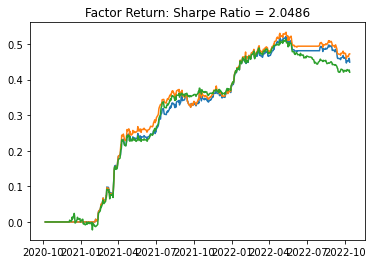

In [56]:
# use the rolling functions
rolling_window = 30

CF_rolling_sr = F_GetRollingFactors(fs_v,retLs,rolling_window,2)  # use sr as weight
CF_rolling_ret  = F_GetRollingFactors(fs_v,retLs,rolling_window,3) # use ret as weight
CF_rolling_mark2 = F_GetRollingFactors(fs_v,retLs,rolling_window,5) # use Markowitz to weight: with 2 constrains

# get the factor return
cost = 0
delayNum = 2
SDate,EDate = 0,len(Close.index)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_sr,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_ret,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_mark2,TotalRet,delayNum,cost,1,SDate,EDate)

In [64]:
res1 = CF_rolling_mark2.iloc[-1,:]
res = res1.copy()
print(res1.sum())
base = res.max() - res.min()
for i in range(110):
    res[i] = (res[i]-res.min())/base
sum = res.sum()
for i in range(110):
    res[i] = res[i]/sum
res.to_csv('rolling_res_1016.csv')

2.19824158875781e-14


In [58]:
CF_rolling_mark2

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,BTC-USD,ETH-USD,BNB-USD,ADA-USD,XRP-USD,SOL-USD,DOGE-USD,DOT-USD,SHIB-USD,AVAX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07,-0.793554,-0.643652,-0.927671,-1.318443,-1.080990,-0.858681,0.233584,-0.069499,-0.305612,-0.587692,...,-1.215190,-1.582749,-1.001387,0.281444,2.305607,-0.963874,2.057878,-0.429507,1.582749,-0.560397
2022-10-10,-0.793554,-0.560397,-0.927671,-1.375792,-1.040365,-1.001387,0.257440,-0.092724,-0.480860,-0.672396,...,-0.963874,-1.895162,-1.080990,0.281444,2.305607,-0.762228,2.057878,-0.455033,1.669545,-0.643652
2022-10-11,-0.615431,-0.793554,-0.963874,-1.215190,-1.001387,-1.080990,0.023150,-0.233584,-0.209860,-0.762228,...,-0.560397,-1.375792,-0.927671,0.257440,2.305607,-0.672396,1.895162,-0.404257,1.438060,-0.533514


In [63]:
res1 = CF_rolling_mark2.iloc[-1,:]
res = res1.copy()
base = res.abs().sum()
for i in range(110):
    res[i] = res[i]/base
res.to_csv('weight_rolling.csv')

0.0010504976075093454
SR: 2.128 AR: 0.263 TO: 0.145
0.0010059707386933373
SR: 2.033 AR: 0.251 TO: 0.143
0.0009409857140240095
SR: 2.238 AR: 0.235 TO: 0.183


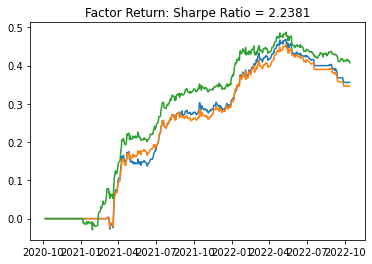

In [60]:
rolling_window = 60

CF_rolling_sr = F_GetRollingFactors(fs_v,retLs,rolling_window,2)  # use sr as weight
CF_rolling_ret  = F_GetRollingFactors(fs_v,retLs,rolling_window,3) # use ret as weight
CF_rolling_mark2 = F_GetRollingFactors(fs_v,retLs,rolling_window,5) # use Markowitz to weight: with 2 constrains

# get the factor return
cost = 0.002
delayNum = 2
SDate,EDate = 0,len(Close.index)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_sr,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_ret,TotalRet,delayNum,cost,1,SDate,EDate)
[sr1 , ret1 , StraRetLine] = PerformanceWithCost(CF_rolling_mark2,TotalRet,delayNum,cost,1,SDate,EDate)

# Class work 1

### new data

In [61]:
# New data
# Go to Maltlab to check data
file = path + 'indexPx.mat'
data1 = mat73.loadmat(file)   
data1 = data1['indexPx']
col = data1['LocalID']
ind = tools.ConTimeDay(data1) 

indexTotalRet = data1['TotalRet']
indexTotalRet = pd.DataFrame(indexTotalRet)
indexTotalRet.columns  = col
indexTotalRet.index = ind

indexTotalRet = indexTotalRet.iloc[cut:]
del data1 ,  col ,  ind, file

indexTotalRet

AssertionError: /Users/justambush/OneDrive/autumn2022/【Data Driven】/1016/raw_data/indexPx.mat does not exist

0.695 0.176 0.092
the SR is:  0.483


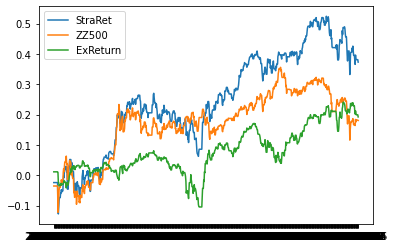

In [ ]:
# get the StraRetLine1 from Sharpe method 
SDate,EDate = 1500,len(Close.index)
num = 100 
cost= 0.002
[sr,ret,StraRetLine1] = GetPortRet(ts_Decay(CF_sr,30),num,SDate,EDate,cost,delayNum,0)

# Get the excess return on ZZ500
zz500 = indexTotalRet['000905']
zz500[zz500.isna()] = 0 
zz500_ots = zz500.iloc[SDate:EDate]

# the strategy return and index return
StraRet_ = StraRetLine1.copy()
plt.plot(StraRet_.cumsum(),label = "StraRet")
plt.plot(zz500_ots.cumsum(),label = "ZZ500")

# excess return 
exRet = StraRet_ - zz500_ots
plt.plot(exRet.cumsum(),label = "ExReturn")
plt.legend()

print('the SR is: ',round(exRet.mean() / exRet.std() * 15,3))

the SR is:  0.588


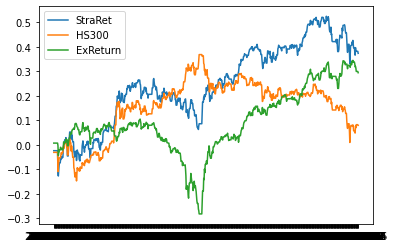

In [ ]:
# Get the excess return on HS300
HS300 = indexTotalRet['000300']
HS300[HS300.isna()] = 0 
HS300_ots = HS300.iloc[SDate:EDate]
StraRet_ = StraRetLine1.copy()
plt.plot(StraRet_.cumsum(),label = "StraRet")
plt.plot(HS300_ots.cumsum(),label = "HS300")
exRet = StraRet_ - HS300_ots
plt.plot(exRet.cumsum(),label = "ExReturn")
plt.legend()
print('the SR is: ',round(exRet.mean() / exRet.std() * 15,3))

### Deal with the barra factor exposure

In [18]:
# Deal with the barra factor exposure
def F_GetResidual(x,y,SDate,EDate):
    from sklearn.linear_model import LinearRegression
    x[x.isna()] = 0
    y[y.isna()] = 0
    Model = LinearRegression()
    residual = x.copy()
    residual[residual.isna()] = 0 
    residual = residual * 0 
    for v in range(len(x.index)):
        if v < SDate or v > EDate:
            continue
        if  TradeDay[v] == 1:
            # print(v)
            x_ = np.array(x.iloc[v]).reshape((-1, 1))
            y_ = np.array(y.iloc[v])
            Model.fit(x_,y_)
            y_pre =  Model.predict(x_)
            residual.iloc[v] = y_ - y_pre
    return residual


In [19]:
# Barra style Factors
# Go to matlab to check the data
file = path + 'BarraFactors.mat'
data1 = mat73.loadmat(file)   
data1 = data1['BarraFactors']

col = data1['LocalID']
ind = tools.ConTimeDay(data1) 
 
barraFs = data1['FactorNames']
barraFs2 = list()
barraFV = list()
for v in barraFs:
    print(v)
    z = data1[v[0]]
    z = pd.DataFrame(z)
    z.columns  = col
    z.index = ind
    z = z.iloc[cut:]
    barraFV.append(z)
    barraFs2.append(v[0])
    
del data1 , barraFs

['BETA']
['MOMENTUM']
['SIZE']
['EARNYILD']
['RESVOL']
['GROWTH']
['BTOP']
['LEVERAGE']
['LIQUIDTY']
['SIZENL']


In [20]:
barraFV[2].tail(5)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,301102,301263,301258,301216,688193,688331,688048,688295,301097,301268
2022-04-02,1.705,1.484,-2.515,-2.742,-1.713,-2.784,-1.742,-0.444,-2.589,-1.576,...,-1.846,-1.788,-2.199,-1.353,-2.735,-0.687,-1.357,NaN,NaN,NaN
2022-04-03,1.705,1.484,-2.515,-2.742,-1.713,-2.784,-1.742,-0.444,-2.589,-1.576,...,-1.846,-1.788,-2.199,-1.353,-2.735,-0.687,-1.357,NaN,NaN,NaN
2022-04-04,1.705,1.484,-2.515,-2.742,-1.713,-2.784,-1.742,-0.444,-2.589,-1.576,...,-1.846,-1.788,-2.199,-1.353,-2.735,-0.687,-1.357,NaN,NaN,NaN
2022-04-05,1.705,1.484,-2.515,-2.742,-1.713,-2.784,-1.742,-0.444,-2.589,-1.576,...,-1.846,-1.788,-2.199,-1.353,-2.735,-0.687,-1.357,NaN,NaN,NaN
2022-04-06,1.705,1.484,-2.515,-2.742,-1.713,-2.784,-1.742,-0.444,-2.589,-1.576,...,-1.846,-1.788,-2.199,-1.353,-2.735,-0.687,-1.357,NaN,NaN,NaN


0.518 0.137 0.202
0.688 0.121 0.064


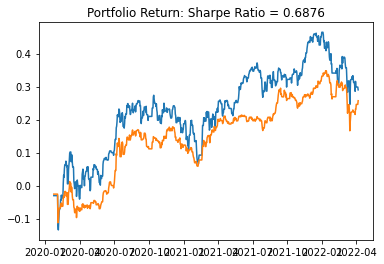

In [21]:
# barra data was found and published in 2014
CF_sr2 = CF_sr.copy()
for v in range(len(barraFV)):
    # print(barraFs2[v])
    CF_sr2 = F_GetResidual(CF_sr2,barraFV[v],SDate-200,EDate)
    CF_sr2 =  pn_TransNorm_controid(CF_sr2,1)
    # Tips: should we cut all the exposure?

[sr,ret,StraRetLine] = GetPortRet(CF_sr,num,SDate,EDate,cost,delayNum,1)
[sr,ret,StraRetLine] = GetPortRet(CF_sr2,num,SDate,EDate,cost,delayNum,1)
# less return , less volatility, less turnover

In [22]:
def F_GetCorrs(x,y,SDate,EDate):
    x[x.isna()] = 0
    y[y.isna()] = 0
    cor = list() 
    for v in range(len(x.index)):
        if v < SDate or v > EDate:
            continue
        if  TradeDay[v] == 1:
            # print(v)
            x_ = np.array(x.iloc[v])
            y_ = np.array(y.iloc[v])
            z = pd.DataFrame()
            z['x'] = x_
            z['y'] = y_
            cor.append(z.corr().values[0,1])
    return np.mean(cor)

for v in range(len(barraFV)):
    CF_sr2 = CF_sr.copy()
    print(barraFs2[v],round(F_GetCorrs(CF_sr,barraFV[v],SDate,EDate),3))
 

BETA 0.009
MOMENTUM -0.13
SIZE 0.016
EARNYILD 0.114
RESVOL -0.35
GROWTH 0.003
BTOP 0.163
LEVERAGE 0.048
LIQUIDTY -0.27
SIZENL -0.056


### Another way to check the non-exposure factor's return

In [23]:
# Another way to check the non-exposure factor's return
# Go to matlab to see the data detail
file = path + 'BarraRiskStats.mat'
data1 =mat73.loadmat(file)   
data1 = data1['BarraRiskStats']

IdioRet = data1['IdioRet']
IdioRet = pd.DataFrame(IdioRet)
IdioRet.columns  = col
IdioRet.index = ind
IdioRet = IdioRet.iloc[cut:]

del data1
IdioRet

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,301102,301263,301258,301216,688193,688331,688048,688295,301097,301268
2015-12-15,0.002919,0.048902,0.058976,-0.011559,-0.005329,-0.015505,0.014927,0.016940,0.008741,-0.016012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-16,-0.000877,-0.038065,-0.025278,-0.016403,-0.010196,-0.033442,-0.016995,-0.001576,-0.014977,0.003500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-17,0.000511,0.063983,-0.028894,0.054643,-0.011626,-0.003098,0.007538,-0.014522,0.000886,-0.023617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-18,-0.000771,0.112487,-0.053371,0.054380,0.025895,0.010572,0.088178,-0.015730,-0.022635,0.004096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2022-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2022-04-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2022-04-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [24]:
def GetRets_Port2(f_,delayNum,cost,num,SDate,EDate):
    f1_stand_D2 = ts_Delay(f_,2)
    StraRet = f1_stand_D2 * IdioRet   # the only change
    Cost = cost * ( f1_stand_D2 - ts_Delay(f1_stand_D2,1) )
    StraRet = StraRet - Cost.abs()
    StraRet= StraRet.iloc[SDate:EDate]
    StraRetLine = StraRet.sum(1) / num 
    StraRetLine[StraRetLine == 0 ] = np.nan
#    StraRetLine.index = tools.Str2times(StraRetLine.index)
    ret = StraRetLine.mean() * 250
    sr = StraRetLine.mean() /StraRetLine.std() * 15 
    return sr,ret, StraRetLine

def GetPortRet3(CF,num,SDate,EDate,cost,delayNum,plotfig):
    f_ = CF.copy()
    numV = list()
    days_ = f_.abs().sum(1)
    for v in range(len(f_.index)):
        if days_.iloc[v] == 0:
            numV.append(0)
            continue
        va11 = f_.iloc[v]
        z = va11.sort_values(ascending = False)
        numV.append(z.iloc[num-1])
    numV = pd.DataFrame(numV)
    numV.index = f_.index
    numV = tools.Repmat(f_,numV) 
    f_[f_ < numV ] = 0
    f_[f_ > 0 ] = 1
    f_[f_.isna()] = 0 
    [sr,ret,StraRetLine] = GetRets_Port2(f_,delayNum,cost,num,SDate,EDate)
    print(round(sr,3),round(ret,3),GetTurnover2(f_,num))
    if plotfig == 1:
        StraRetLine.index= tools.Str2times(StraRetLine.index)
        StraRetLine[StraRetLine.isna()] = 0
        cumsum_ = StraRetLine.cumsum()
        plt.plot(cumsum_)
        plt.title('Portfolio idio Return')
    return sr,ret,StraRetLine

0.867 0.229 0.202
1.799 0.12 0.202


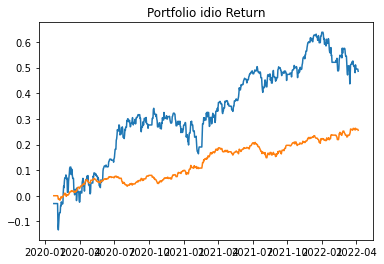

In [25]:
# use totalRet
cost = 0 

[sr,ret,StraRetLine] = GetPortRet(CF_sr,num,SDate,EDate,cost,delayNum,1)
# use idioRet
[sr,ret,StraRetLine] = GetPortRet3(CF_sr,num,SDate,EDate,cost,delayNum,1)
plt.show()
# The strategy return of idioRet is common way to predict true performance

# Class Work 3

### machine learning

In [26]:
# Tools to Machine Learning

def F_mat2fit(fs_v,Y,Volume,SDate,EDate):  # matrix to table for fixing
    # prepare data
    vol = Volume.iloc[SDate:EDate]
    y_ = Y.iloc[SDate:EDate]
    # y_ = pn_TransNorm_controid(y_,1)
    idx = vol.abs().sum(1) > 0
    y_ = y_[idx]
    vol = vol[idx]
    y_[y_.isna()] = 0 
    vol[vol.isna()] = 0  
    ys = y_.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'Y'})    # stack(dropna = False）
    vols = vol.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'vol'})
    ys['Vol'] = vols['vol']
    CleanX = list()
    for v in fs_v:
        c = v.iloc[SDate:EDate]
        c = c[idx]
        CleanX.append(c)
    # convert
    n = 1 
    for z in CleanX:
        z[z.isna()] = 0  
        fs = z.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'f'})
        ys['f'+ str(n)] = fs['f']
        n = n + 1
    # cleaning
    ys = ys[ys['Vol'] > 0 ]
    # ys = ys[ys['Y'] .isna() == False ]
    return ys

def F_fit2mat(df_test,colname):  # turn fixed table data back to matrix
    df = df_test[['date','code',colname] ]
    data4=df.set_index(['date','code'])
    data5=data4.unstack()
    indx = list(data5.index)
    a = list(data5.columns)
    code = list()
    for v in a:
        code.append(v[1])
    out = pd.DataFrame(data5.values)
    out.index = indx
    out.columns = code
    return out

def ts_DelayFut(df, num ):  # get each day's future data 
    dfCleaned = OnlyTrading(df,TradeDay)
    dfCleaned = dfCleaned.shift(-num)   
    df = AllDate(df,dfCleaned,TradeDay)
    return df   
        

In [27]:
# get Y 
pre_num = 20
Y = ts_DelayFut(AdjClose, pre_num ) / AdjClose - 1
Y = pn_TransNorm_controid(Y,1)  # Tips: should we?

Y

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,301102,301263,301258,301216,688193,688331,688048,688295,301097,301268
2015-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-16,0.831666,2.296153,-1.481342,0.148814,-0.164469,1.985679,0.112117,-0.575037,-0.715103,-1.101671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-17,0.937966,2.063285,-1.246602,-0.283930,-0.024562,2.048234,0.482947,-0.655284,-0.377147,-0.851105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-18,0.813802,1.495106,-1.026373,-0.844590,-0.364480,1.979189,-0.180164,-0.635122,0.269753,-0.870871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Convert matrix to table

SDate = 500
EDate = len(Close.index)
df2 = F_mat2fit(fs_v,Y,Volume,SDate,EDate)

df2

,date,code,Y,Vol,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2017-04-28,000001,1.205502,28644636.0,-0.622,-0.107,0.361,0.293,3.191,3.382,0.616,3.382,3.368,-0.688
1,2017-04-28,000002,1.801345,35743115.0,-0.752,0.572,0.394,0.393,0.076,0.557,-2.790,1.331,1.286,-0.776
3,2017-04-28,000005,-0.407617,4984699.0,-0.655,0.059,0.177,-0.168,-0.580,-0.009,-0.235,0.720,0.664,-0.793
4,2017-04-28,000006,1.056018,15031442.0,-0.775,-1.093,-1.173,-0.978,1.044,-0.077,-1.007,0.050,0.404,-0.971
6,2017-04-28,000008,-0.619911,12319363.0,-0.596,-0.245,-0.401,-0.019,0.890,0.698,-0.575,0.644,1.107,-0.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805457,2022-04-06,603331,0.000000,2517640.0,-1.084,-0.211,-0.008,0.152,0.320,0.453,-0.217,0.798,0.635,-1.228
5805458,2022-04-06,603856,0.000000,1639060.0,-1.804,2.035,2.080,-0.216,-0.901,-1.285,1.511,-0.801,-0.911,-2.178
5805459,2022-04-06,603488,0.000000,2140140.0,-0.555,-0.238,0.277,0.034,0.744,0.441,0.329,0.316,0.263,-0.931
5805460,2022-04-06,603679,0.000000,1448960.0,0.492,-0.360,-0.980,-1.269,0.654,-0.195,-1.251,-0.392,-0.376,0.925


In [29]:
# GBDT initialization
import lightgbm as lgb   # pip install lightgbm
# cut the train dataset, the validation dataset, the test/prediction dataset
length_train = '2019-01-01'
length_valid = '2018-08-01'
length_test = '2019-01-30'
# the symbol for x
FactorNamesPd =  ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10']
# train round number
roundNUM = 100
# parameters
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'l2'},  # 评估函数
    'num_leaves': 10,   # 叶子节点数
    'learning_rate': 0.1,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq':5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 警告), >0 显示信息
}

# cut the dataset
df_train = df2[df2['date'] <= length_train]
df_test = df2[df2['date'] > length_test]
df_valid= df_train[df_train['date'] >= length_valid]

X_train = df_train[FactorNamesPd]
y_train = df_train['Y']
X_valid = df_valid[FactorNamesPd]
y_valid = df_valid['Y']

lgb_train = lgb.Dataset(X_train, y_train) # 特定数据格式，提高运算速度
lgb_valid = lgb.Dataset(X_valid, y_valid) # 

# training
print('Start training...')
gbm = lgb.train(params,lgb_train,num_boost_round=roundNUM,valid_sets=lgb_valid,early_stopping_rounds= 10 ) 


Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1282784, number of used features: 10
[LightGBM] [Info] Start training from score 0.005731
[1]	valid_0's l2: 0.968786
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.965953
[3]	valid_0's l2: 0.963469
[4]	valid_0's l2: 0.961401
[5]	valid_0's l2: 0.95967
[6]	valid_0's l2: 0.958206
[7]	valid_0's l2: 0.956658
[8]	valid_0's l2: 0.955332
[9]	valid_0's l2: 0.954232
[10]	valid_0's l2: 0.953386
[11]	valid_0's l2: 0.95241
[12]	valid_0's l2: 0.951613
[13]	valid_0's l2: 0.950864
[14]	valid_0's l2: 0.950384
[15]	valid_0's l2: 0.949961
[16]	valid_0's l2: 0.949495
[17]	valid_0's l2: 0.948798
[18]	valid_0's l2: 0.948465
[19]	valid_0's l2: 0.947898
[20]	valid_0's l2: 0.947318
[21]	valid_0's l2: 0.9469

In [30]:
print('Start predicting...')
X_test = df_test[FactorNamesPd]
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration) 
df_test['Y_pred'] = y_pred
corr = df_test[['Y','Y_pred']].corr()
print(corr)


Start predicting...
               Y    Y_pred
Y       1.000000  0.130829
Y_pred  0.130829  1.000000


In [31]:
# Turn the reg_result to matrix
out2 = F_fit2mat(df_test,'Y_pred')

CF_lgb = Close.copy()
CF_lgb[CF_lgb.isna()] = 0 
CF_lgb = CF_lgb * 0 
CF_lgb = CF_lgb + out2


In [32]:
CF_lgb.tail(10)

,000001,000002,000003,000004,000005,000006,000007,000008,000009,000010,...,688787,688788,688789,688793,688798,688799,688800,688819,688981,689009
2022-03-28,0.136290,0.090306,NaN,-0.176906,0.114978,0.069689,-0.037447,0.132000,0.069014,0.143538,...,0.058035,0.104076,-0.130925,0.009743,0.016682,-0.023663,-0.210343,0.136075,0.189007,0.012236
2022-03-29,0.140505,0.074109,NaN,-0.130566,0.114978,0.051926,-0.027976,0.149821,0.108675,0.143538,...,0.053749,0.112802,-0.082161,0.014051,0.050780,-0.011267,-0.186199,0.136075,0.189007,0.009295
2022-03-30,0.140505,-0.136068,NaN,-0.108349,0.119092,-0.123026,-0.027976,0.131213,0.149302,0.147266,...,0.058035,0.110905,-0.081492,0.011360,0.045918,0.001906,-0.214112,0.129602,0.189007,0.012236
2022-03-31,0.133485,-0.183248,NaN,-0.098126,0.112072,-0.232820,-0.027976,0.154690,0.103233,0.134846,...,0.053749,0.110905,-0.070609,0.011360,0.050780,0.010550,-0.177461,0.136075,0.172576,0.003191
2022-04-01,0.099528,-0.216102,NaN,-0.080394,0.130177,-0.237256,-0.027976,0.157447,0.103233,0.134846,...,0.058035,0.110905,-0.070609,0.017006,0.058611,0.028174,-0.123685,0.136075,0.167551,0.006132
2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-06,0.082665,-0.244336,NaN,-0.064529,0.128677,-0.249266,-0.027976,0.157447,0.088324,0.125363,...,0.057345,0.113071,-0.253179,0.011360,0.016980,0.030291,-0.189061,0.125848,0.160548,0.083034


SR: 0.809 AR: 0.048 TO: 0.193


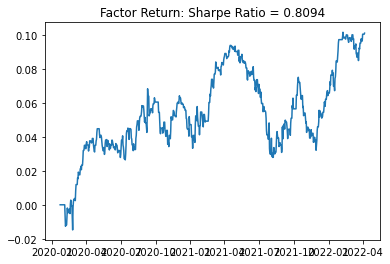

[-0.0308]
[-0.0308, 0.1963]
[-0.0308, 0.1963, 0.2608]
[-0.0308, 0.1963, 0.2608, 0.3038]
[-0.0308, 0.1963, 0.2608, 0.3038, 0.2907]


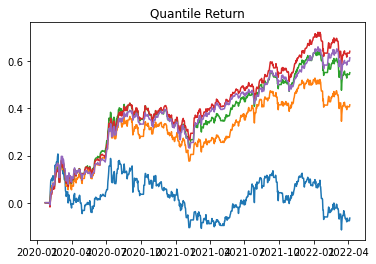

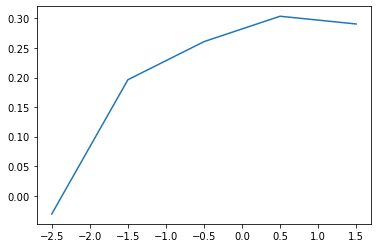

In [33]:
SDate = 1500
EDate = len(Close.index)
num = 100 
cost= 0.002
Q = 5

CF_lgb =  pn_TransNorm_controid(CF_lgb,SDate)
[sr1 , ret1 , StraRetLine_CF_lgb] = PerformanceWithCost(CF_lgb,TotalRet,delayNum,cost,1,SDate,EDate)
plt.show()
quantiles1 = GetQuantileRet(CF_lgb,Q,SDate,EDate,delayNum,1)
plt.show()
plt.plot(quantiles1)


0.234 0.042 0.408
1.189 0.176 0.07


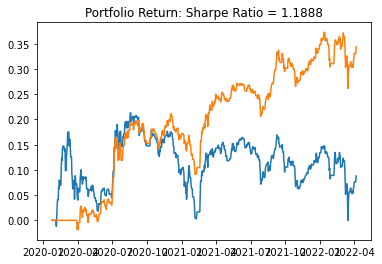

In [34]:
[sr,ret,StraRetLine] = GetPortRet(CF_lgb,num,SDate,EDate,cost,delayNum,1)

[sr,ret,StraRetLine] = GetPortRet(ts_Decay(CF_lgb,40),num,SDate,EDate,cost,delayNum,1)

0.707 0.182 0.104
1.023 0.166 0.111


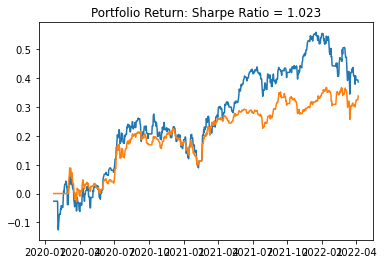

In [35]:
[sr,ret,StraRetLine] = GetPortRet(ts_Decay(CF_sr,20),num,SDate,EDate,cost,delayNum,1)
[sr,ret,StraRetLine] = GetPortRet(ts_Decay(CF_lgb,20),num,SDate,EDate,cost,delayNum,1)

#### bigger testing

In [36]:
# Bigger testing

def F_trainAndTest(df2,FactorNamesPd,c_f,roundNUM):
    length_train = '2019-12-01'
    length_valid = '2019-06-01'
    length_test = '2019-12-15'
   # roundNUM = 100
    params = {
        'task': 'train',
        'boosting_type': 'gbdt',  # 设置提升类型
        'objective': 'regression', # 目标函数
        'metric': {'l2'},  # 评估函数
        'num_leaves': 10,   # 叶子节点数
        'learning_rate': 0.1,  # 学习速率
        'feature_fraction': 0.9, # 建树的特征选择比例
        'bagging_fraction': 0.8, # 建树的样本采样比例
        'bagging_freq':5,  # k 意味着每 k 次迭代执行bagging
        'verbose': 1 # <0 显示致命的, =0 显示错误 警告), >0 显示信息
    }
    df_train = df2[df2['date'] <= length_train]
    df_test = df2[df2['date'] > length_test]
    df_valid= df_train[df_train['date'] >= length_valid]
    X_train = df_train[FactorNamesPd]
    y_train = df_train.Y
    X_valid = df_valid[FactorNamesPd]
    y_valid = df_valid.Y
    lgb_train = lgb.Dataset(X_train, y_train) # 将数据保存到LightGBM二进制文件将使加载更快
    lgb_valid = lgb.Dataset(X_valid, y_valid) # 
    print('Start training...')
    gbm = lgb.train(params,lgb_train,num_boost_round=roundNUM,valid_sets=lgb_valid,early_stopping_rounds= 5 ,categorical_feature = c_f ) 
    print('Start predicting...')
    X_test = df_test[FactorNamesPd]
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration,categorical_feature = c_f) 
    df_test['Y_pred'] = y_pred
    corr = df_test[['Y','Y_pred']].corr()
    print(corr)
    out2 = F_fit2mat(df_test,'Y_pred')
    CF_lgb = Close.copy()
    CF_lgb[CF_lgb.isna()] = 0 
    CF_lgb = CF_lgb * 0 
    CF_lgb = CF_lgb + out2
    CF_lgb =  pn_TransNorm_controid(CF_lgb,SDate)
    return CF_lgb

def F_mat2fit2(fs_v,Y,Volume,SDate,EDate,FactorNamesPd):
    # Prepare data use: .stack()
    vol = Volume.iloc[SDate:EDate]
    y_ = Y.iloc[SDate:EDate]
    # y_ = pn_TransNorm_controid(y_,1)
    idx = vol.abs().sum(1) > 0
    y_ = y_[idx]
    vol = vol[idx]
    y_[y_.isna()] = 0 
    vol[vol.isna()] = 0  
    ys = y_.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'Y'})    # stack(dropna = False）
    vols = vol.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'vol'})
    ys['Vol'] = vols['vol']
    CleanX = list()
    for v in fs_v:
        c = v.iloc[SDate:EDate]
        c = c[idx]
        CleanX.append(c)
    # Convert
    for v in range(len(CleanX)):
        z = CleanX[v]
        z[z.isna()] = 0  
        Fname_ = FactorNamesPd[v]
        fs = z.stack().reset_index().rename(columns={'level_0':'date','level_1':'code', 0:'f'})
        ys[Fname_] = fs['f']
    # cleaning
    ys = ys[ys['Vol'] > 0 ]
    # ys = ys[ys['Y'] .isna() == False ]  # will delete the last days data
    return ys

In [37]:
# Factors type 1 :  from price and volume
f_formulas = ['-1*ts_Decay((ts_Decay(Close,10)-ts_Decay(VWAP,10))/VWAP*(High-Low),40)',
      '-1*ts_Decay(IdioRet*(Volume/ts_Delay(Volume,1)),40)',
       '-1*ts_Decay(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',
       '-1*ts_Decay(ts_Delta(Close*ts_Decay(TotalRet,5),5)*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),60)',
       '-1*ts_Decay(VWAP/Close*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),10)',
       '-1*ts_Decay(VWAP/Close*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),40)',
       '-1*ts_DecayExp(ts_Mean(IdioRet*(High-Low)/Close*(Volume/ts_Delay(Volume,1)),20),60)',
       '-1*ts_DecayExp(ts_Mean(VWAP/Close*(High-Low)/Close,20),20)',
       '-1*ts_DecayExp(VWAP/Close*(High-Low)/Close,60)',
       '-1*ts_Mean((ts_Decay(Close,10)-ts_Decay(VWAP,10))/VWAP*(High-Low)/Close,20)',
           # more factors   
       '(ts_Mean(Close,7) - ts_Mean(Close,30)) / ts_Mean(Close,30) ',
       '-1*ts_Max(High,10)/ts_Min(Low,10)',
       '(ts_Mean(Close,10)-ts_Mean(Low,10))/(ts_Mean(High,10)-ts_Mean(Low,10))',      
       'ts_Decay(Volume,5)/ts_Decay(Volume,20)',
       '(ts_Mean(Open,1) - ts_Delay(Close,1))/ts_Delay(Close,1)',      
       'ts_Decay((ts_Max(Close,10)-ts_Min(VWAP,10))/VWAP*(High- Low),40 )',
       'ts_DecayExp((ts_Decay(  Close,10)-ts_Decay(Open,10))/VWAP-(High- Low),50 )',
       'ts_Decay(-(Close+High+Low)/3*Volume,40)',
       'ts_Decay(ts_Mean(High,5)/ts_Mean(Low,5), 10)'
      ]

fs_v2 = list()
for v in f_formulas:
    fs_v2.append(eval(v))
    
FactorNamesPd = list()
for v in range(len(fs_v2)):
    fs_v2[v] = pn_TransNorm_controid(fs_v2[v],1 ).round(3)
    FactorNamesPd.append('f'+ str(v))
    
# Factors type 2: barra style factors
file = path + 'BarraFactors.mat'
data1 =mat73.loadmat(file)   
data1 = data1['BarraFactors']
col = data1['LocalID']
ind = tools.ConTimeDay(data1) 
barraFs = data1['FactorNames']
barraFs2 = list()
barraFV = list()
for v in barraFs:
    # print(v)
    z = data1[v[0]]
    z = pd.DataFrame(z)
    z.columns  = col
    z.index = ind
    z = z.iloc[cut:]
    barraFV.append(z)
    barraFs2.append(v[0])   
del data1 , barraFs , file

for v in range(len(barraFV)):
    fs_v2.append(barraFV[v])
    FactorNamesPd.append('B'+ str(v))
    
del barraFV

# Factors type 3: Industry and IdioRet
file = path + 'BarraRiskStats.mat'
data1 = mat73.loadmat(file)   
data1 = data1['BarraRiskStats']

IdioRet = data1['IdioRet']
IdioRet = pd.DataFrame(IdioRet)
IdioRet.columns  = col
IdioRet.index = ind
IdioRet = IdioRet.iloc[cut:]

BarraIndLabel = data1['BarraIndLabel']
BarraIndLabel = pd.DataFrame(BarraIndLabel)
BarraIndLabel.columns  = col
BarraIndLabel.index = ind
BarraIndLabel = BarraIndLabel.iloc[cut:]
BarraIndLabel[BarraIndLabel.isna()] = 0 
del data1 , file

fs_v2.append(ts_Decay(IdioRet,20))
FactorNamesPd.append('tsDidio1')
fs_v2.append(ts_Decay(IdioRet,60))
FactorNamesPd.append('tsDidio2')
fs_v2.append(ts_Decay(IdioRet,20) - ts_Decay(IdioRet,60))
FactorNamesPd.append('tsDidio3')

fs_v2.append(BarraIndLabel)
FactorNamesPd.append('BarraIndLabel')

c_f = ['BarraIndLabel']
del  BarraIndLabel


In [38]:
print(FactorNamesPd)

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'tsDidio1', 'tsDidio2', 'tsDidio3', 'BarraIndLabel']


In [39]:
pre_num = 20
Y = ts_DelayFut(AdjClose, pre_num ) / AdjClose - 1
Y = pn_TransNorm_controid(Y,1)  

SDate = 500
EDate = len(Close.index)
df2 = F_mat2fit2(fs_v2,Y,Volume,SDate,EDate,FactorNamesPd)


In [40]:
df2.tail(10)

,date,code,Y,Vol,f0,f1,f2,f3,f4,f5,...,B4,B5,B6,B7,B8,B9,tsDidio1,tsDidio2,tsDidio3,BarraIndLabel
5805452,2022-04-06,300595,0.0,11917941.0,1.383,0.175,0.938,0.885,-0.598,-0.331,...,0.483,0.858,-1.433,-1.501,0.675,0.367,-0.001018,-0.002675,0.001657,3.0
5805453,2022-04-06,300584,0.0,7020592.0,1.963,-0.562,-1.794,2.425,-1.656,-2.401,...,1.506,0.375,-1.323,-1.312,2.546,0.239,-0.014551,0.010610,-0.025162,3.0
5805454,2022-04-06,300591,0.0,12795555.0,-0.368,-1.128,-0.684,-0.578,-0.634,-0.460,...,0.243,-2.411,-0.956,-0.992,0.955,-2.293,0.005168,0.002320,0.002848,14.0
5805455,2022-04-06,300639,0.0,11046525.0,-1.380,-1.056,-1.319,-0.667,-0.398,-0.880,...,0.520,1.209,-0.595,-1.473,1.288,0.534,0.002970,0.003324,-0.000354,3.0
5805456,2022-04-06,603316,0.0,25539230.0,-1.165,0.804,2.512,0.996,-1.142,-2.593,...,2.530,-0.214,-0.101,1.282,1.386,-2.624,0.001715,0.003208,-0.001492,10.0
5805457,2022-04-06,603331,0.0,2517640.0,-1.084,-0.379,-0.102,0.152,0.320,0.453,...,-0.013,-0.119,-0.499,0.568,-0.579,-1.984,0.000816,0.002062,-0.001246,9.0
5805458,2022-04-06,603856,0.0,1639060.0,-1.804,2.176,2.101,-0.216,-0.901,-1.285,...,-0.035,0.109,0.221,-1.087,-0.293,-0.794,-0.008811,-0.003318,-0.005493,12.0
5805459,2022-04-06,603488,0.0,2140140.0,-0.555,-0.418,0.175,0.034,0.744,0.441,...,-0.125,-0.232,-0.480,-1.589,-0.898,-1.615,0.004033,0.002019,0.002013,9.0
5805460,2022-04-06,603679,0.0,1448960.0,0.492,-0.559,-1.044,-1.269,0.654,-0.195,...,0.680,0.018,-0.280,0.115,-0.269,-2.903,-0.000843,-0.000458,-0.000385,16.0
5805461,2022-04-06,002965,0.0,971700.0,1.382,-0.357,-0.609,-1.954,1.015,-1.561,...,-0.027,-0.255,-0.081,0.585,-0.028,-0.723,-0.002848,-0.000207,-0.002641,9.0


In [41]:
# Reg
SDate = 500
roundNUM = 500  # 500
CF_lgb2 = F_trainAndTest(df2,FactorNamesPd,c_f,roundNUM)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8189
[LightGBM] [Info] Number of data points in the train set: 2069735, number of used features: 33
[LightGBM] [Info] Start training from score 0.003881
[1]	valid_0's l2: 0.988247
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.984763
[3]	valid_0's l2: 0.981876
[4]	valid_0's l2: 0.979379
[5]	valid_0's l2: 0.977278
[6]	valid_0's l2: 0.975278
[7]	valid_0's l2: 0.973483
[8]	valid_0's l2: 0.971771
[9]	valid_0's l2: 0.97011
[10]	valid_0's l2: 0.968786
[11]	valid_0's l2: 0.967431
[12]	valid_0's l2: 0.966545
[13]	valid_0's l2: 0.96545
[14]	valid_0's l2: 0.964624
[15]	valid_0's l2: 0.963683
[16]	valid_0's l2: 0.96293
[17]	valid_0's l2: 0.962268
[18]	valid_0's l2: 0.961699
[19]	valid_0's l2: 

[274]	valid_0's l2: 0.923649
[275]	valid_0's l2: 0.923533
[276]	valid_0's l2: 0.92341
[277]	valid_0's l2: 0.923129
[278]	valid_0's l2: 0.923108
[279]	valid_0's l2: 0.922966
[280]	valid_0's l2: 0.922947
[281]	valid_0's l2: 0.922849
[282]	valid_0's l2: 0.922728
[283]	valid_0's l2: 0.922675
[284]	valid_0's l2: 0.922552
[285]	valid_0's l2: 0.922451
[286]	valid_0's l2: 0.922375
[287]	valid_0's l2: 0.922281
[288]	valid_0's l2: 0.922156
[289]	valid_0's l2: 0.921972
[290]	valid_0's l2: 0.921911
[291]	valid_0's l2: 0.92184
[292]	valid_0's l2: 0.92186
[293]	valid_0's l2: 0.921804
[294]	valid_0's l2: 0.921725
[295]	valid_0's l2: 0.921686
[296]	valid_0's l2: 0.921618
[297]	valid_0's l2: 0.921322
[298]	valid_0's l2: 0.921275
[299]	valid_0's l2: 0.921198
[300]	valid_0's l2: 0.921207
[301]	valid_0's l2: 0.92117
[302]	valid_0's l2: 0.921072
[303]	valid_0's l2: 0.920999
[304]	valid_0's l2: 0.920944
[305]	valid_0's l2: 0.920867
[306]	valid_0's l2: 0.920776
[307]	valid_0's l2: 0.920673
[308]	valid_0's l2

0.933 0.194 0.415
1.618 0.325 0.064


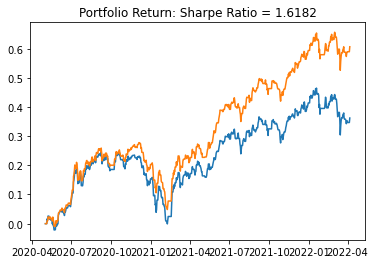

In [42]:
SDate = 1600
EDate = len(Close.index)

cost= 0.002
[sr,ret,StraRetLine] = GetPortRet(CF_lgb2,num,SDate,EDate,cost,delayNum,1)   #  TO: 0.415
[sr,ret,StraRetLine] = GetPortRet(ts_Decay(CF_lgb2,40),num,SDate,EDate,cost,delayNum,1)

1.164372502835078


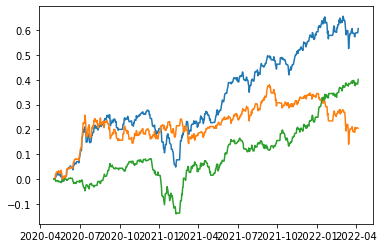

In [43]:
zz500 = indexTotalRet['000905']
zz500[zz500.isna()] = 0 

zz500_ots = zz500.iloc[SDate:EDate]
zz500_ots.index = tools.Str2times(zz500_ots.index) 

StraRet_ = StraRetLine.copy()
plt.plot(StraRet_.cumsum())
plt.plot(zz500_ots.cumsum())

exRet = StraRet_ - zz500_ots
plt.plot(exRet.cumsum())

print(exRet.mean() / exRet.std() * 15)